In [28]:
import cv2
import numpy as np
import json
from matplotlib import pyplot as plt


In [29]:
scale = 1015 / 512

In [30]:
image_path_5 = "/media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0001.jpg"
json_path_5 = "/media/arush/New Volume/Work/Giloma_Kaggle/Data/Glioma_MDC_2025_training/Glioma_MDC_2025_training/training0001.json" 
output_path = "/media/arush/New Volume/Work/Giloma_Kaggle/Code/extracted_region_padded.png"

In [31]:
with open(json_path_5, "r") as f:
    data = json.load(f)

print(data["shapes"][0]["points"], )
type(data["shapes"][0]["points"])

img = cv2.imread(image_path_5)
print(img.shape)

[[262.3829787234043, 187.56028368794324], [269.4751773049645, 187.56028368794324], [274.43971631205676, 189.68794326241132], [275.8581560283688, 194.65248226950354], [276.5673758865248, 200.32624113475177], [273.7304964539007, 208.12765957446808], [269.4751773049645, 211.6737588652482], [260.25531914893617, 211.6737588652482], [252.45390070921985, 206.70921985815602], [251.74468085106383, 197.48936170212764]]
(512, 512, 3)


In [38]:
image_path = "/media/arush/New Volume/Work/Giloma_Kaggle/Data/upsampled/training/training0001.jpg"
json_path = "/media/arush/New Volume/Work/Giloma_Kaggle/Data/upsampled/training/training0001.json"
output_path = "/media/arush/New Volume/Work/Giloma_Kaggle/Code/extracted_region_padded.png"

In [39]:
with open(json_path, "r") as f:
    data = json.load(f)

print(data["shapes"][0]["points"])
type(data["shapes"][0]["points"])

# Divide all elements by 2
data["shapes"][0]["points"] = [[x/scale, y/scale] for x, y in data["shapes"][0]["points"]]


print(data["shapes"][0]["points"])
img = cv2.imread(image_path)
print(img.shape)

[[262.3829787234043, 187.56028368794324], [269.4751773049645, 187.56028368794324], [274.43971631205676, 189.68794326241132], [275.8581560283688, 194.65248226950354], [276.5673758865248, 200.32624113475177], [273.7304964539007, 208.12765957446808], [269.4751773049645, 211.6737588652482], [260.25531914893617, 211.6737588652482], [252.45390070921985, 206.70921985815602], [251.74468085106383, 197.48936170212764]]
[[132.35476365160886, 94.61168989973098], [135.93230618733185, 94.61168989973098], [138.436585962338, 95.68495266044788], [139.1520944694826, 98.189232435454], [139.5098487230549, 101.05126646403242], [138.07883170876568, 104.98656325332774], [135.93230618733185, 106.77533452118924], [131.28150089089195, 106.77533452118924], [127.34620410159661, 104.27105474618314], [126.98844984802432, 99.6202494497432]]
(1015, 1015, 3)


251 187 277 212


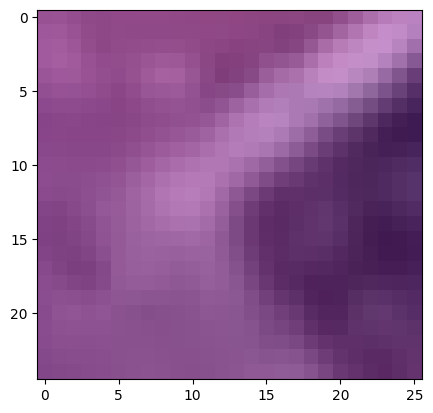

In [41]:
# Load the image
image = cv2.imread(image_path)

# Load and parse the JSON file
with open(json_path, "r") as f:
    data = json.load(f)

# Extract polygon points
polygon_points = data["shapes"][0]["points"]
polygon_points = np.array(polygon_points, dtype=np.int32)

# Find the bounding rectangle around the polygon
x, y, w, h = cv2.boundingRect(polygon_points)
print(x, y, x+w, y+h)

# Crop the image to the bounding rectangle
cropped_image = image[y:y+h, x:x+w]
cropped_image_2 = image[x:x+w,y:y+h]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()
# plt.imshow(cv2.cvtColor(cropped_image_2, cv2.COLOR_BGR2RGB))

plt.show()